# Importing libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [15]:
df = pd.read_csv("D:\\joti\\projects\\codealpha_tasks\\sales_prediction\\dataset\\Advertising.csv")

# Data Cleaning

In [16]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [18]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [19]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [20]:
# drop extra columns
df.drop(columns = ["Unnamed: 0"], inplace = True)

In [21]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [22]:
# checking missing values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [23]:
# checking duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

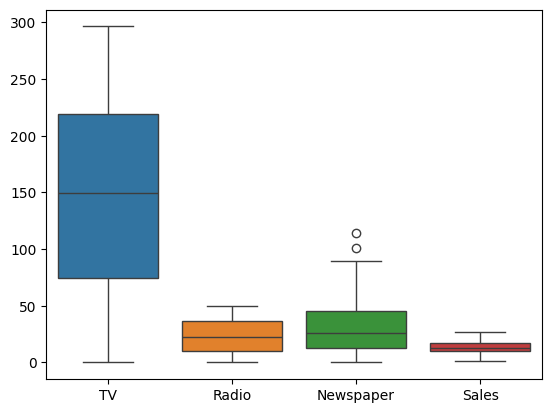

In [24]:
# checking outliers
sns.boxplot(data=df)
plt.show()

In [25]:
# remove outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


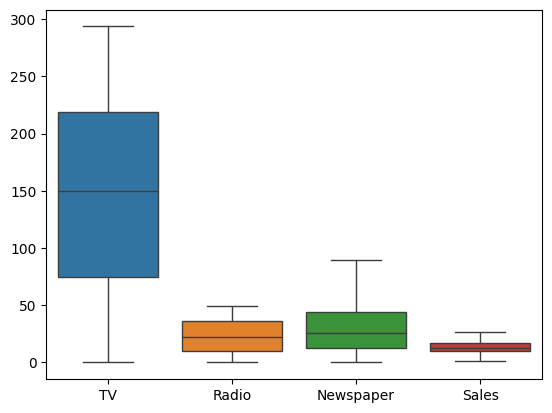

In [26]:
sns.boxplot(data=df)
plt.show()

In [27]:
# rename columns
df.rename(columns = {"TV":"TV_Ad_Spend", "Radio":"Radio_Ad_Spend", "Newspaper":"Newspaper_Ad_Spend", "Sales":"Sales_Ad_Spend"}, inplace = True)

In [28]:
df.columns

Index(['TV_Ad_Spend', 'Radio_Ad_Spend', 'Newspaper_Ad_Spend',
       'Sales_Ad_Spend'],
      dtype='object')

In [32]:
# save cleaned dataset
df.to_csv("Cleaned_Sales_Prediction.csv", index = False)